In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.rc('font', family='Tahoma')  
plt.rcParams['axes.unicode_minus'] = False  


In [22]:
df = pd.read_excel('all_tcas67.xlsx')

In [23]:
df_selected = df[['Text','Sentiment']]

In [24]:
print(df_selected.head)

<bound method NDFrame.head of                                                    Text Sentiment
0     พี่เอ้ TCAS ที่ให้เด็กม.6 จ่ายค่าสมัครสอบ เลือ...       neg
1     น้องม.4 มาเรียนคอร์ส Tcasละ เราเพิ่งรู้ว่าอยาก...       neg
2     ; 𝟢𝟣 𝖺𝗎𝗀 𝟤𝟥 𓏳 𝟢𝟢:𝟢𝟢 𝗁𝗋𝗌\n\n𓊪   วันนี้ตื่นมาก็บ...       neu
3           แต่ยังหวังนโยบาย TCAS ปิดสวิตซ์ทปอ.อยู่นะ 😭       pos
4     @Heyydarling1 เราว่าได้นะคะ ตอนเราเรียนคอร์สเอ...       pos
...                                                 ...       ...
4364  มทส วิศวะ รับเด็กซิ่วรอบอะไรมั่งหรอครับ แล้วเด...       neg
4365  อยากซิ่วไปที่อื่นแต่เรียนอยู่ปี1แล้วควรเรียนให...         q
4366  📑#Portfolio 10 หน้า ประกอบด้วยอะไรบ้าง\n⭐ส่วนแ...       neu
4367  หลายมหา'ลัย เริ่มรับสมัคร #dek68 แบบไม่เข้าร่ว...       neg
4368                                  ทำข้อสอบ tcas ค่ะ       neu

[4369 rows x 2 columns]>


In [25]:
sentiment_counts = df_selected['Sentiment'].value_counts()
print(df['Sentiment'].value_counts())

Sentiment
neu                   2160
neg                   1107
q                      556
pos                    492
neu, neg                17
neg, neu                 7
pos, neg                 5
neu, neu, neg            4
neg, neu, neg            4
pos, neu                 3
neg, pos                 2
q, neu                   2
neu, pos                 2
pod                      1
neu, pos, neu            1
neg, neg, neu            1
neu, , pos               1
neu, neg, pos, neg       1
neu, q                   1
q, neg                   1
neu,q                    1
Name: count, dtype: int64


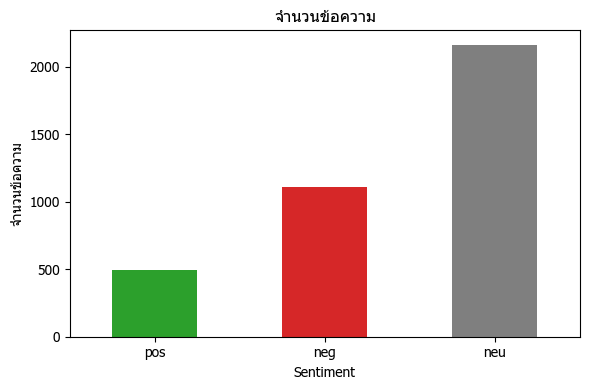

In [26]:
valid_sentiment = ['pos','neg','neu']
filltered = df_selected[df_selected['Sentiment'].isin(valid_sentiment)]
sentiment_counts = filltered['Sentiment'].value_counts().reindex(valid_sentiment)

plt.figure(figsize=(6,4)) 
sentiment_counts.plot(kind='bar',color=['tab:green', 'tab:red', 'tab:gray'])
plt.title("จำนวนข้อความ")
plt.xlabel("Sentiment")
plt.ylabel("จำนวนข้อความ")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [27]:
from pythainlp.corpus.common import thai_stopwords
from pythainlp.util import isthai
import string
from pythainlp.tokenize import word_tokenize

# สร้างคอลัมน์ text_tokenized จากคอลัมน์ Text
df['text_tokenized'] = df['Text'].apply(lambda x: ' '.join(word_tokenize(str(x), engine='newmm')))


stopwords = set(thai_stopwords())

def remove_stopwords(text):
    tokens = text.split()

    punct = set(string.punctuation + '“”‘’"\'ๆฯ…•’@—–-')  

    tokens = [w for w in tokens if all(c not in punct for c in w)]

    tokens = [w for w in tokens if isthai(w)]

    tokens = [w for w in tokens if w not in stopwords and w.strip() != ""]

    return ' '.join(tokens)

# ใช้กับคอลัมน์ text_tokenized
df['text_no_stopwords'] = df['text_tokenized'].apply(remove_stopwords)


In [28]:
print(df[['Text', 'text_tokenized', 'text_no_stopwords']].head())


                                                Text  \
0  พี่เอ้ TCAS ที่ให้เด็กม.6 จ่ายค่าสมัครสอบ เลือ...   
1  น้องม.4 มาเรียนคอร์ส Tcasละ เราเพิ่งรู้ว่าอยาก...   
2  ; 𝟢𝟣 𝖺𝗎𝗀 𝟤𝟥 𓏳 𝟢𝟢:𝟢𝟢 𝗁𝗋𝗌\n\n𓊪   วันนี้ตื่นมาก็บ...   
3        แต่ยังหวังนโยบาย TCAS ปิดสวิตซ์ทปอ.อยู่นะ 😭   
4  @Heyydarling1 เราว่าได้นะคะ ตอนเราเรียนคอร์สเอ...   

                                      text_tokenized  \
0  พี่ เอ้   TCAS   ที่ ให้ เด็ก ม. 6   จ่าย ค่าส...   
1  น้อง ม. 4   มา เรียน คอร์ส   Tcas ละ   เรา เพิ...   
2  ;   𝟢𝟣   𝖺𝗎𝗀   𝟤𝟥   𓏳   𝟢𝟢:𝟢𝟢   𝗁𝗋𝗌 \n \n 𓊪   ...   
3  แต่ ยัง หวัง นโยบาย   TCAS   ปิด สวิตซ์ ทปอ. อ...   
4  @Heyydarling1   เรา ว่า ได้ นะคะ   ตอน เรา เรี...   

                                   text_no_stopwords  
0  พี่ เอ้ เด็ก จ่าย ค่าสมัคร สอบ เลือก อันดับ คร...  
1  น้อง เรียน คอร์ส รู้ สาย แพทย์ เรียน สอบ กลาง ...  
2  ตื่น บ่ายโมง พัก เคลียร์ งาน โรงเรียน อ่าน รัก...  
3                                 หวัง นโยบาย สวิตซ์  
4  นะคะ ตอน เรียน คอร์ส เอนท์ แค ล สถิติ เรียน คอ..

In [29]:
valid_labels = ['pos', 'neg', 'neu']
df_clean = df[df['Sentiment'].isin(valid_labels)].copy()


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['text_no_stopwords'].fillna(''))
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())


In [31]:
X = bow_df.loc[df_clean.index]
y = df_clean['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [32]:
valid_labels = ['pos', 'neg', 'neu']
df_selected = df_selected[df_selected['Sentiment'].isin(valid_labels)].copy()

X = bow_df.loc[df_selected.index]
y = df_selected['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [34]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7021276595744681
              precision    recall  f1-score   support

         neg       0.66      0.60      0.63       222
         neu       0.73      0.84      0.78       432
         pos       0.59      0.30      0.39        98

    accuracy                           0.70       752
   macro avg       0.66      0.58      0.60       752
weighted avg       0.69      0.70      0.69       752

